# Laboratorio No. 4
## Sección "A"


# 1)¿Cuál es el tamaño en bytes de un array de 1000 elementos de tipo booleano?

In [ ]:
import numpy as np


array_booleano = np.ones(1000, dtype=bool)
tamano_bytes = array_booleano.nbytes
print(f"Tamaño en bytes de un array de 1000 elementos booleanos: {tamano_bytes}")


Tamaño en bytes de un array de 1000 elementos booleanos: 1000


# 2) Crear un array de enteros pares en [1,100] en orden decreciente

In [ ]:

array_pares = np.arange(100, 0, -2)
print("Últimos 10 elementos:", array_pares[-10:])

Últimos 10 elementos: [20 18 16 14 12 10  8  6  4  2]


# 3)Seleccionar subarrays del array dado

In [3]:
array_original = np.array([[2, 4, 5, 6],
                           [0, 3, 7, 4],
                           [8, 8, 5, 2],
                           [1, 5, 6, 1]])

subarray1 = array_original[1, :]
print("Subarray 1:", subarray1)

subarray2 = array_original[::2, ::2]  # Seleccionando las posiciones dadas
print("Subarray 2:", subarray2)

Subarray 1: [0 3 7 4]
Subarray 2: [[2 5]
 [8 5]]


# 4)Media aritmética de la diferencia (a - b)

In [4]:
a = np.array([1, 4, 2, 7])
b = np.array([1, 3, 2, 9])
diferencia = a - b
media_diferencia = np.mean(diferencia)
print(f"Media de la diferencia (a-b): {media_diferencia}")

Media de la diferencia (a-b): -0.25


# 5)Agregar coordenadas al array original y mostrar dimensiones

In [5]:
coordenadas = np.array([[1.33, 4.5],
                        [30.0, 10.7],
                        [70.2, 0.5]])

nueva_coordenada = np.array([[37.1, -3.6]])
coordenadas = np.vstack([coordenadas, nueva_coordenada])
print("Dimensiones del nuevo array:", coordenadas.shape)


Dimensiones del nuevo array: (4, 2)


# 6)Transponer el array y agregar dos nuevas coordenadas

In [6]:
coordenadas_T = coordenadas.T
nuevas_coordenadas = np.array([[10.8, 3.0], [35.8, 12.0]])
coordenadas_T = np.hstack([coordenadas_T, nuevas_coordenadas])
print("Nuevo array transpuesto:", coordenadas_T)

Nuevo array transpuesto: [[ 1.33 30.   70.2  37.1  10.8   3.  ]
 [ 4.5  10.7   0.5  -3.6  35.8  12.  ]]


## Sección "B"

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar archivo CSV
df = pd.read_csv('./NucleosPoblacion.csv')

# Mostrar las primeras filas
print(df.head())


Matplotlib is building the font cache; this may take a moment.


   FID  OBJECTID     Texto  Poblacion  CodMun Municipio  CodProvin  \
0    0         1   Agüimes    29431.0   35002   Agüimes         35   
1    1         2   Antigua    10458.0   35003   Antigua         35   
2    2         3  Arrecife    58156.0   35004  Arrecife         35   
3    3         4    Arucas    36745.0   35006    Arucas         35   
4    4         5    Gáldar    24473.0   35009    Gáldar         35   

    Provincia          X          Y  
0  Las Palmas -15.446012  27.900542  
1  Las Palmas -14.013301  28.418966  
2  Las Palmas -13.551451  28.960649  
3  Las Palmas -15.521512  28.117496  
4  Las Palmas -15.654111  28.143873  


# 1) ¿Cuántos Municipios tienen más de 100,000 habitantes?

In [ ]:
columna_poblacion = "Poblacion"  
df_mayor_100k = df[df[columna_poblacion] > 100000]
num_municipios_mayor_100k = df_mayor_100k.shape[0]
print(f"Número de municipios con más de 100,000 habitantes: {num_municipios_mayor_100k}")

Número de municipios con más de 100,000 habitantes: 62


# 2) Gráfica de barras de la población de cada ciudad, ordenada de menor a mayor

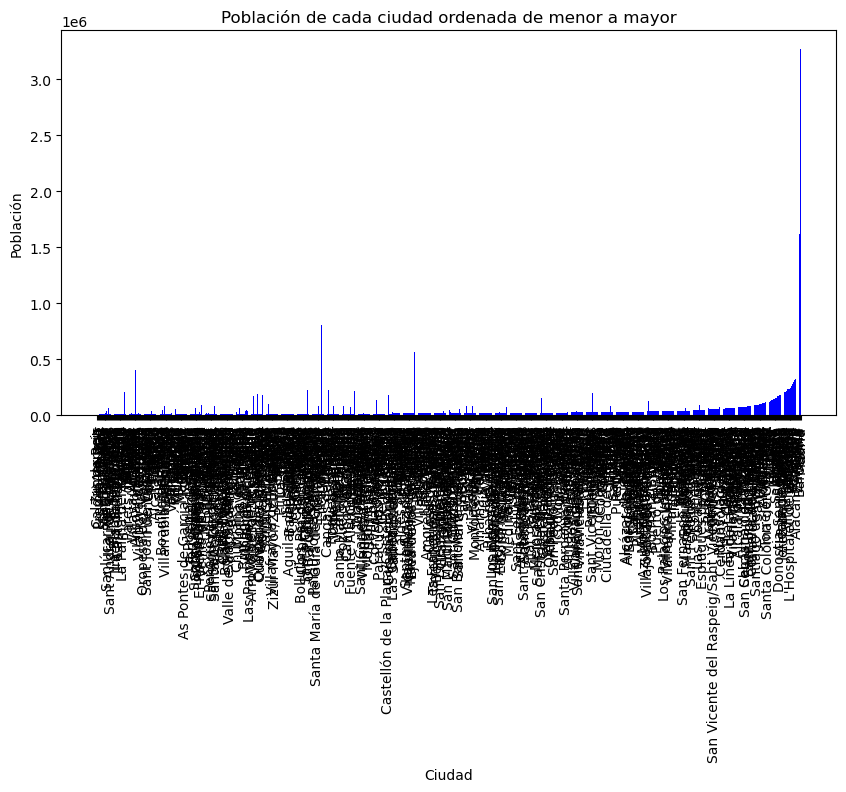

In [ ]:
columna_ciudad = "Municipio"  # Se utiliza la columna Municipio del archivo brindado.
df_ordenado = df.sort_values(by=columna_poblacion, ascending=True)

plt.figure(figsize=(10, 5))
plt.bar(df_ordenado[columna_ciudad], df_ordenado[columna_poblacion], color='blue')
plt.xticks(rotation=90)
plt.xlabel("Ciudad")
plt.ylabel("Población")
plt.title("Población de cada ciudad ordenada de menor a mayor")
plt.show()

# a) Segunda ciudad más poblada

In [15]:
segunda_ciudad = df_ordenado.iloc[-2][columna_ciudad]
print(f"La segunda ciudad más poblada es: {segunda_ciudad}")

La segunda ciudad más poblada es: Barcelona


# b) Posición de Granada en el ranking de ciudades más pobladas

In [16]:
granada_posicion = df_ordenado.reset_index().index[df_ordenado[columna_ciudad] == "Granada"].tolist()
if granada_posicion:
    print(f"Granada ocupa la posición: {granada_posicion[0] + 1} en el ranking de ciudades más pobladas.")
else:
    print("Granada no se encuentra en el dataset.")

Granada ocupa la posición: 835 en el ranking de ciudades más pobladas.


# 3) ¿Cuántos municipios de La Rioja tienen más de 20,000 habitantes?

In [17]:
columna_provincia = "Provincia"  # Reemplaza con el nombre correcto
df_la_rioja = df[df[columna_provincia] == "La Rioja"]
df_la_rioja_mayor_20k = df_la_rioja[df_la_rioja[columna_poblacion] > 20000]
num_municipios_la_rioja_20k = df_la_rioja_mayor_20k.shape[0]
print(f"Número de municipios en La Rioja con más de 20,000 habitantes: {num_municipios_la_rioja_20k}")

Número de municipios en La Rioja con más de 20,000 habitantes: 2


# 4) ¿Cuál es el municipio situado más al Norte?

In [26]:
columna_latitud = "Y"  # Reemplaza con el nombre correcto
indice_max = df[columna_latitud].idxmax()
municipio_norte = df.loc[indice_max]
print(f"El municipio más al Norte es: {municipio_norte['Provincia']}, Provincia: {municipio_norte['Provincia']}, Población: {municipio_norte[columna_poblacion]}")

El municipio más al Norte es: Lugo, Provincia: Lugo, Población: 16211.0


# 5) Estadísticas descriptivas de la población en la provincia de Granada

In [21]:
columna_provincia = "Provincia"  # Reemplaza con el nombre correcto
df_granada = df[df[columna_provincia] == "Granada"]

media_poblacion = df_granada[columna_poblacion].mean()
mediana_poblacion = df_granada[columna_poblacion].median()
desviacion_poblacion = df_granada[columna_poblacion].std()
max_poblacion = df_granada[columna_poblacion].max()
min_poblacion = df_granada[columna_poblacion].min()

print(f"Estadísticas de la población en la provincia de Granada:")
print(f"Media: {media_poblacion:.2f}")
print(f"Mediana: {mediana_poblacion:.2f}")
print(f"Desviación estándar: {desviacion_poblacion:.2f}")
print(f"Máximo: {max_poblacion}")
print(f"Mínimo: {min_poblacion}")

Estadísticas de la población en la provincia de Granada:
Media: 30217.85
Mediana: 17526.00
Desviación estándar: 50355.49
Máximo: 239154.0
Mínimo: 10386.0


# 6) Realizar un histograma con la población de los Municipios para cada provincia

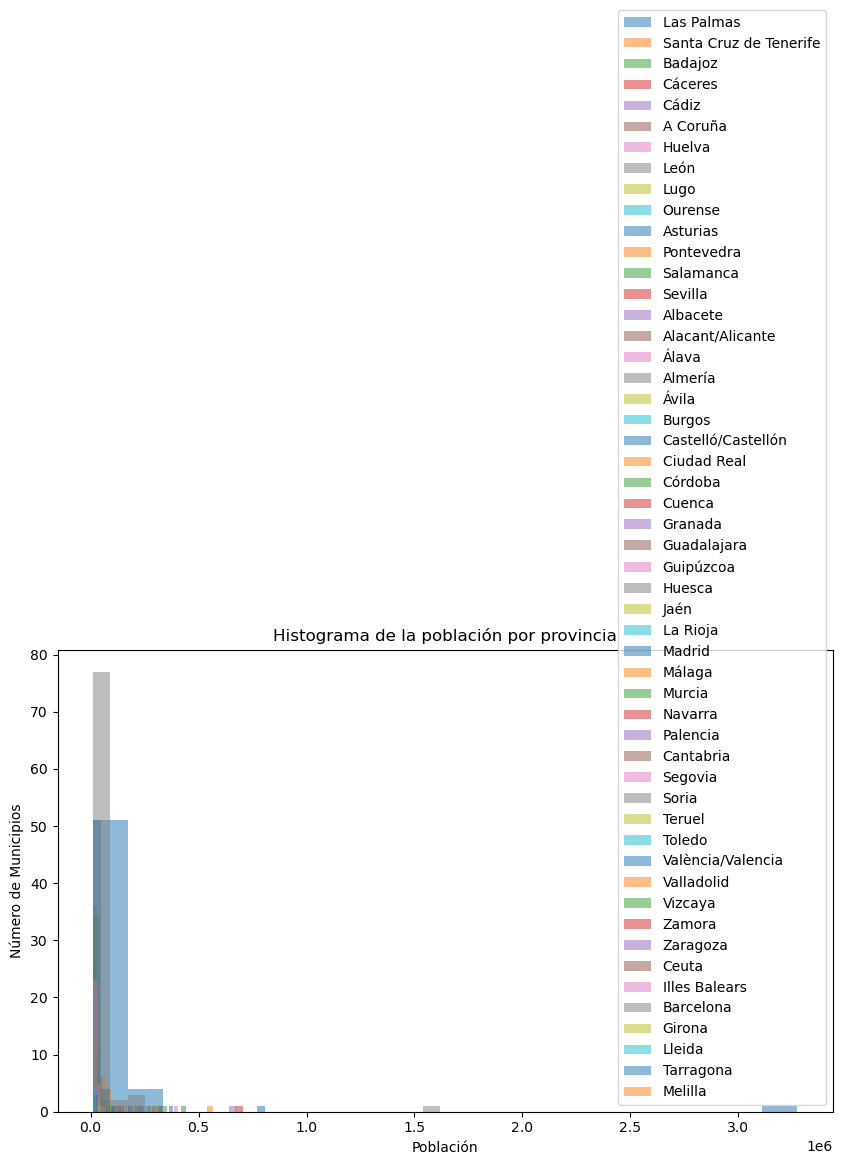

In [22]:
columna_provincia = "Provincia"  # Reemplaza con el nombre correcto
columna_poblacion = "Poblacion"  # Reemplaza con el nombre correcto

plt.figure(figsize=(10, 6))
for provincia in df[columna_provincia].unique():
    df_provincia = df[df[columna_provincia] == provincia]
    plt.hist(df_provincia[columna_poblacion], bins=20, alpha=0.5, label=provincia)

plt.xlabel("Población")
plt.ylabel("Número de Municipios")
plt.title("Histograma de la población por provincia")
plt.legend()
plt.show()

# 7) Seleccionar 50 municipios aleatorios y calcular la media y desviación estándar de la población

In [23]:
sample_size = 50
if len(df) >= sample_size:
    df_sample = df.sample(n=sample_size, random_state=42)  # Seleccionar 50 municipios aleatoriamente
    media_sample = df_sample[columna_poblacion].mean()
    desviacion_sample = df_sample[columna_poblacion].std()
    print(f"Promedio de la población de los 50 municipios seleccionados: {media_sample:.2f}")
    print(f"Desviación estándar de la población de los 50 municipios seleccionados: {desviacion_sample:.2f}")
else:
    print("El dataset tiene menos de 50 municipios, no se puede hacer la selección aleatoria.")

Promedio de la población de los 50 municipios seleccionados: 36000.82
Desviación estándar de la población de los 50 municipios seleccionados: 44560.11


# 8) Municipios más cercano y más lejano a Madrid

In [24]:
columna_latitud = "Y"  # Reemplaza con el nombre correcto
columna_longitud = "X"  # Reemplaza con el nombre correcto
columna_ciudad = "Provincia"  # Reemplaza con el nombre correcto

# Coordenadas de Madrid
madrid_lat = 40.4168
madrid_lon = -3.7038

# Función para calcular la distancia euclidiana
def calcular_distancia(lat1, lon1, lat2, lon2):
    return np.sqrt((lat1 - lat2) ** 2 + (lon1 - lon2) ** 2)

# Calcular la distancia de cada municipio a Madrid
df["Distancia_Madrid"] = df.apply(lambda row: calcular_distancia(row[columna_latitud], row[columna_longitud], madrid_lat, madrid_lon), axis=1)

# Encontrar el municipio más cercano y más lejano
municipio_mas_cercano = df.loc[df["Distancia_Madrid"].idxmin(), columna_ciudad]
municipio_mas_lejano = df.loc[df["Distancia_Madrid"].idxmax(), columna_ciudad]

print(f"El municipio más cercano a Madrid es: {municipio_mas_cercano}")
print(f"El municipio más lejano a Madrid es: {municipio_mas_lejano}")

El municipio más cercano a Madrid es: Madrid
El municipio más lejano a Madrid es: Santa Cruz de Tenerife
